In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import acquire as acq
import prep
import graphviz
from env import get_db_url
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#ignore warnings
import warnings
warnings.filterwarnings('ignore')


Reading from CSV file...


### Using the titanic data:

What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [2]:
titanic_df = acq.get_titanic_data()
titanic_df_clean, train, validate, test = prep.prep_titanic(titanic_df)
train.info()


Reading from CSV file...
Reading from CSV file...
<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 850 to 421
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 498 non-null    int64  
 1   pclass                   498 non-null    int64  
 2   sibsp                    498 non-null    int64  
 3   parch                    498 non-null    int64  
 4   fare                     498 non-null    float64
 5   alone                    498 non-null    int64  
 6   sex_male                 498 non-null    uint8  
 7   embark_town_Queenstown   498 non-null    uint8  
 8   embark_town_Southampton  498 non-null    uint8  
dtypes: float64(1), int64(5), uint8(3)
memory usage: 28.7 KB


In [3]:
print(f'Survival rate on the Titanic: {titanic_df_clean.survived.mean():.2%}')
print(f'Number of survivors: {len(titanic_df_clean[titanic_df_clean.survived == 1])}')
print(f'Number who perished: {len(titanic_df_clean[titanic_df_clean.survived == 0])}')

Survival rate on the Titanic: 38.38%
Number of survivors: 342
Number who perished: 549


In [4]:
validate.info()
#test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 307 to 607
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 214 non-null    int64  
 1   pclass                   214 non-null    int64  
 2   sibsp                    214 non-null    int64  
 3   parch                    214 non-null    int64  
 4   fare                     214 non-null    float64
 5   alone                    214 non-null    int64  
 6   sex_male                 214 non-null    uint8  
 7   embark_town_Queenstown   214 non-null    uint8  
 8   embark_town_Southampton  214 non-null    uint8  
dtypes: float64(1), int64(5), uint8(3)
memory usage: 12.3 KB


### Decision Trees

In [5]:
X_train = train.drop(columns= ['survived'])
y_train = train.survived

X_validate = validate.drop(columns= ['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

clf = DecisionTreeClassifier(max_depth=3, random_state=302)
clf.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=3, random_state=302)

[Text(558.0, 570.7800000000001, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]'),
 Text(279.0, 407.70000000000005, 'pclass <= 2.5\ngini = 0.392\nsamples = 179\nvalue = [48, 131]'),
 Text(139.5, 244.62, 'fare <= 149.035\ngini = 0.118\nsamples = 95\nvalue = [6, 89]'),
 Text(69.75, 81.53999999999996, 'gini = 0.093\nsamples = 82\nvalue = [4, 78]'),
 Text(209.25, 81.53999999999996, 'gini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(418.5, 244.62, 'parch <= 0.5\ngini = 0.5\nsamples = 84\nvalue = [42, 42]'),
 Text(348.75, 81.53999999999996, 'gini = 0.457\nsamples = 51\nvalue = [18, 33]'),
 Text(488.25, 81.53999999999996, 'gini = 0.397\nsamples = 33\nvalue = [24, 9]'),
 Text(837.0, 407.70000000000005, 'fare <= 15.173\ngini = 0.305\nsamples = 319\nvalue = [259, 60]'),
 Text(697.5, 244.62, 'fare <= 13.25\ngini = 0.204\nsamples = 200\nvalue = [177, 23]'),
 Text(627.75, 81.53999999999996, 'gini = 0.213\nsamples = 190\nvalue = [167, 23]'),
 Text(767.25, 81.53999999999996, 'gini

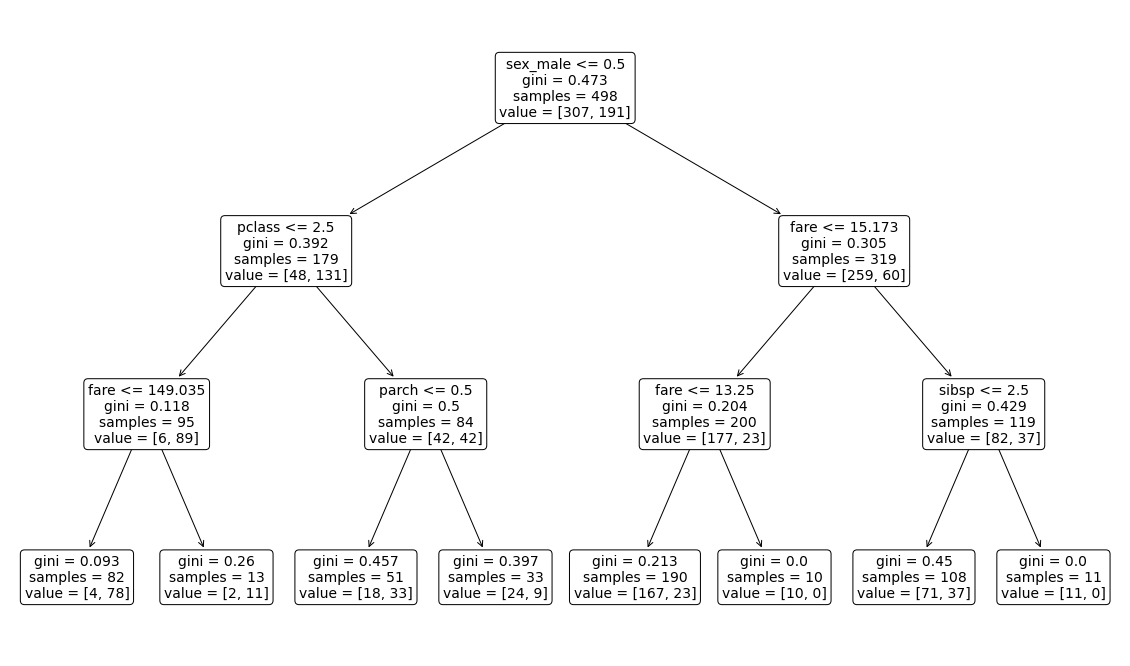

In [6]:
plt.figure(figsize=(20, 12))
plot_tree(clf, feature_names=X_train.columns, rounded=True)

In [7]:
import sklearn.tree

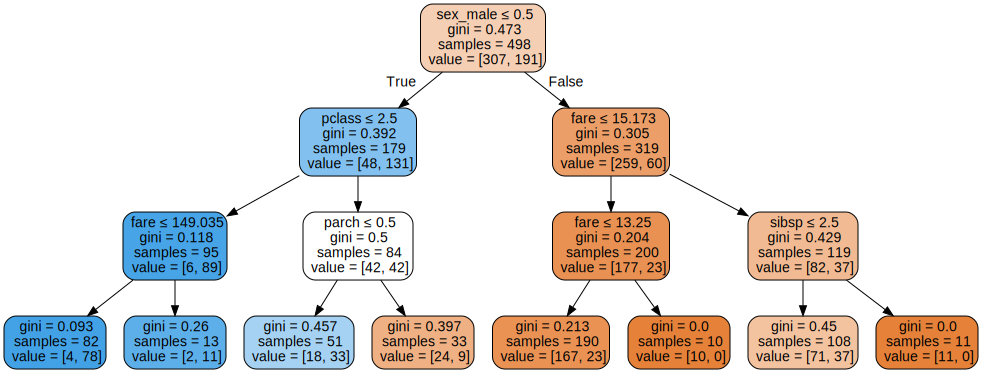

In [10]:
titan_data = sklearn.tree.export_graphviz(clf, feature_names= X_train.columns,
    filled= True, rounded= True, 
    special_characters= True)
graph = graphviz.Source(titan_data)
graph

In [11]:
train_predicts = clf.predict(X_train)
actual = y_train

print(classification_report(actual, train_predicts))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       307
           1       0.84      0.64      0.72       191

    accuracy                           0.81       498
   macro avg       0.82      0.78      0.79       498
weighted avg       0.82      0.81      0.81       498



In [12]:
validate_predicts = clf.predict(X_validate)
valid_actual = y_validate

print(classification_report(valid_actual, validate_predicts))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       132
           1       0.78      0.62      0.69        82

    accuracy                           0.79       214
   macro avg       0.79      0.76      0.77       214
weighted avg       0.79      0.79      0.78       214



In [13]:
print(clf.score(X_train, y_train))
print(clf.score(X_validate, y_validate))

0.8132530120481928
0.7897196261682243


In [14]:
model_two = DecisionTreeClassifier(max_depth=2, random_state=302)

model_two.fit(X_train, y_train)

model_two_predicts = model_two.predict(X_train)
model_two_actual = y_train

print(classification_report(model_two_actual, model_two_predicts))


              precision    recall  f1-score   support

           0       0.75      0.98      0.85       307
           1       0.94      0.47      0.62       191

    accuracy                           0.78       498
   macro avg       0.84      0.72      0.74       498
weighted avg       0.82      0.78      0.76       498



In [15]:
model_two.fit(X_validate, y_validate)

model2_val_pred = model_two.predict(X_validate)
model2_val_act = y_validate

print(classification_report(model2_val_act, model2_val_pred))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86       132
           1       0.96      0.52      0.68        82

    accuracy                           0.81       214
   macro avg       0.86      0.75      0.77       214
weighted avg       0.84      0.81      0.79       214



In [16]:
print(model_two.score(X_train, y_train))
print(model_two.score(X_validate, y_validate))

0.7831325301204819
0.8084112149532711


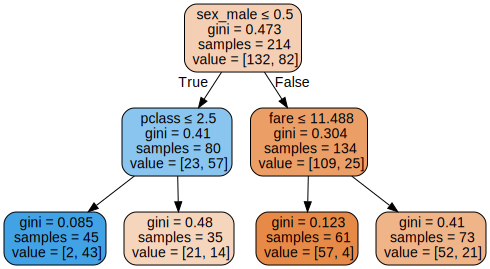

In [17]:
model2_data = sklearn.tree.export_graphviz(model_two, feature_names= X_train.columns, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(model2_data)
graph

In [18]:
telco_df = acq.get_telco_data()


Reading from CSV file...


In [19]:
telco_df_clean, telco_train, telco_validate, telco_test = prep.prep_telco(telco_df)

telco_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5981 to 1671
Data columns (total 51 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            3937 non-null   object 
 1   gender                                 3937 non-null   object 
 2   senior_citizen                         3937 non-null   int64  
 3   partner                                3937 non-null   object 
 4   dependents                             3937 non-null   object 
 5   tenure                                 3937 non-null   int64  
 6   phone_service                          3937 non-null   object 
 7   multiple_lines                         3937 non-null   object 
 8   internet_service_type_id               3937 non-null   int64  
 9   online_security                        3937 non-null   object 
 10  online_backup                          3937 non-null   object 
 11  d

In [21]:
X_telco_train = telco_train.drop(columns= ['churn_Yes'])
y_telco_train = telco_train.churn_Yes

X_telco_validate = telco_validate.drop(columns= ['churn_Yes'])
y_telco_validate = telco_validate.churn_Yes

X_telco_test = telco_test.drop(columns= ['churn_Yes'])
y_telco_test = telco_test.churn_Yes

telco_model1 = DecisionTreeClassifier(max_depth= 3, random_state=302)

X_telco_train.head()
print(y_telco_train.sum())
print(len(y_telco_train))

1046
3937


In [22]:
X_telco_train = X_telco_train.select_dtypes(include=np.number)

In [23]:
X_telco_validate = X_telco_validate.select_dtypes(include=np.number)
X_telco_test = X_telco_test.select_dtypes(include=np.number)

In [24]:
X_telco_train.columns

Index(['senior_citizen', 'tenure', 'internet_service_type_id',
       'contract_type_id', 'payment_type_id', 'monthly_charges',
       'total_charges', 'gender_Male', 'partner_Yes', 'dependents_Yes',
       'phone_service_Yes', 'multiple_lines_No phone service',
       'multiple_lines_Yes', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No internet service',
       'online_backup_Yes', 'device_protection_No internet service',
       'device_protection_Yes', 'tech_support_No internet service',
       'tech_support_Yes', 'streaming_tv_No internet service',
       'streaming_tv_Yes', 'streaming_movies_No internet service',
       'streaming_movies_Yes', 'paperless_billing_Yes',
       'contract_type_One year', 'contract_type_Two year',
       'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check', 'internet_service_type_Fiber optic',
       'internet_service_type_None'],
      dtype='object')

In [25]:
telco_model1.fit(X_telco_train, y_telco_train)

telco_model1_predicts = telco_model1.predict(X_telco_train)
telco_model1_actual = y_telco_train



print(classification_report(telco_model1_actual, telco_model1_predicts))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2891
           1       0.70      0.41      0.51      1046

    accuracy                           0.80      3937
   macro avg       0.75      0.67      0.69      3937
weighted avg       0.78      0.80      0.78      3937



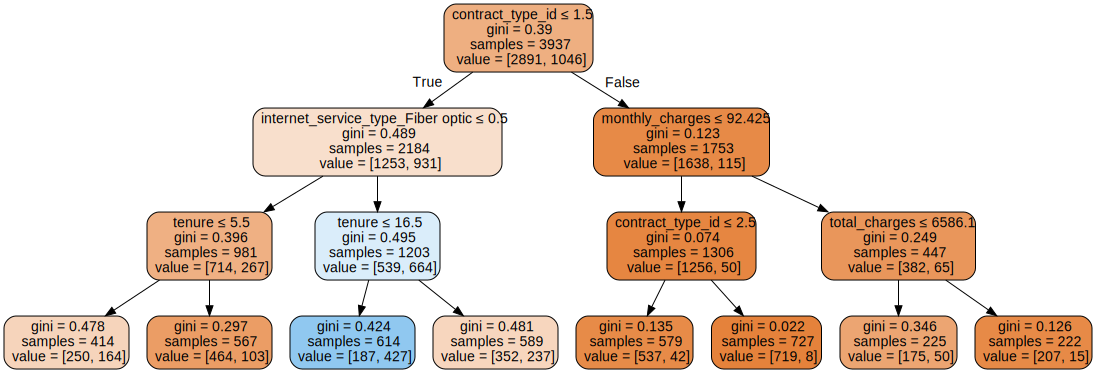

In [26]:
telco_model1_data = sklearn.tree.export_graphviz(telco_model1, out_file=None,feature_names= X_telco_train.columns, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(telco_model1_data)
graph

In [27]:
telco_model2 = DecisionTreeClassifier(max_depth=2, random_state=302)
telco_model2.fit(X_telco_train, y_telco_train)

telco_model2_predicts = telco_model2.predict(X_telco_train)
telco_model2_actual = y_telco_train

print(classification_report(telco_model2_actual, telco_model2_predicts))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      2891
           1       0.55      0.63      0.59      1046

    accuracy                           0.77      3937
   macro avg       0.71      0.72      0.71      3937
weighted avg       0.78      0.77      0.77      3937



In [28]:
print(f'Model 1 score: {telco_model1.score(X_telco_train, y_telco_train)}')
print(f'Model 2 score: {telco_model2.score(X_telco_train, y_telco_train)}')


Model 1 score: 0.7952755905511811
Model 2 score: 0.7660655321310642


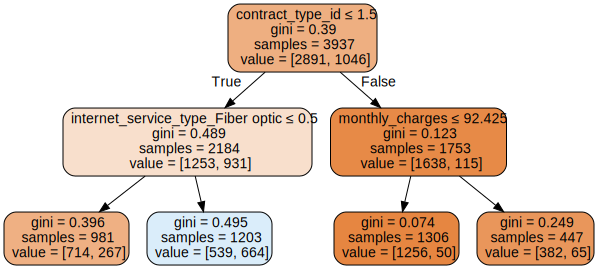

In [30]:
telco_model2_data = sklearn.tree.export_graphviz(
    telco_model2, 
    out_file=None, 
    feature_names=X_telco_train.columns, 
    filled=True, rounded=True, 
    special_characters=True)
graph = graphviz.Source(telco_model2_data)
graph

### Random Forests

In [51]:
titanic_rf1 = RandomForestClassifier(
    bootstrap= True,
    class_weight= None,
    criterion='gini',
    min_samples_leaf=1,
    n_estimators=100,
    max_depth= 10,
    random_state= 302
)
titanic_rf1.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=302)

In [52]:
rf1_pred = titanic_rf1.predict(X_train)
rf1_actual = y_train
rf1_prob = titanic_rf1.predict_proba(X_train)
print(f'Prediction probability for model: {rf1_prob.mean()}')
print(f'Accuracy of random forest on training set: {titanic_rf1.score(X_train, y_train):.2f}')
print(f'Confusion matrix for random forest on training set:\n{confusion_matrix(rf1_actual, rf1_pred)}')
print(f'Classification report for random forest on set:\n{classification_report(rf1_actual, rf1_pred)}')

Prediction probability for model: 0.5
Accuracy of random forest on training set: 0.93
Confusion matrix for random forest on training set:
[[296  11]
 [ 25 166]]
Classification report for random forest on set:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       307
           1       0.94      0.87      0.90       191

    accuracy                           0.93       498
   macro avg       0.93      0.92      0.92       498
weighted avg       0.93      0.93      0.93       498



In [38]:
X_train.columns

Index(['pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male',
       'embark_town_Queenstown', 'embark_town_Southampton'],
      dtype='object')

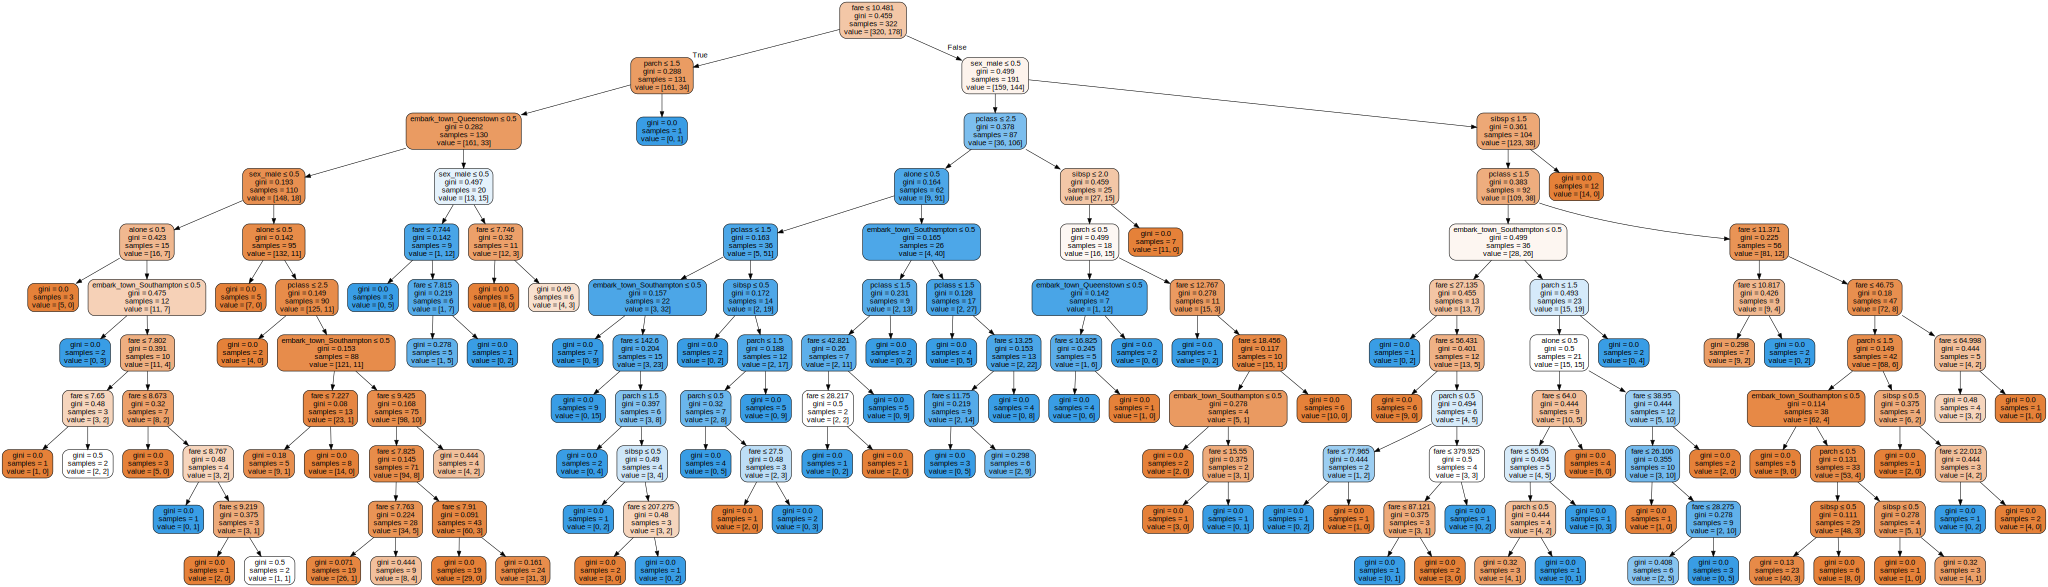

In [55]:
rf1_estimator = titanic_rf1.estimators_[98]
titanic_rf1_data = sklearn.tree.export_graphviz(rf1_estimator, out_file=None, feature_names=X_train.columns, filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(titanic_rf1_data)
graph

In [54]:
graph.render('dot', 'pdf', outfile= 'titanic_rf1.pdf')

'titanic_rf1.pdf'

In [56]:
titanic_rf2 = RandomForestClassifier(
    bootstrap= True,
    class_weight= None,
    criterion='gini',
    min_samples_leaf=2,
    n_estimators=100,
    max_depth= 7,
    random_state= 302
)
titanic_rf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=2, random_state=302)

In [64]:
rf2_pred = titanic_rf2.predict(X_train)
rf2_actual = y_train
rf2_prob = titanic_rf2.predict_proba(X_train)
print(f'Prediction probability for model: {rf2_prob.mean():.2%}')
print(f'Accuracy of random forest on training set: {titanic_rf2.score(X_train, y_train):.2f}')
print(f'Confusion matrix for random forest on training set:\n{confusion_matrix(rf2_actual, rf2_pred)}')
print(f'Classification report for random forest on set:\n{classification_report(rf2_actual, rf2_pred)}')

Prediction probability for model: 50.00%
Accuracy of random forest on training set: 0.87
Confusion matrix for random forest on training set:
[[288  19]
 [ 48 143]]
Classification report for random forest on set:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       307
           1       0.88      0.75      0.81       191

    accuracy                           0.87       498
   macro avg       0.87      0.84      0.85       498
weighted avg       0.87      0.87      0.86       498



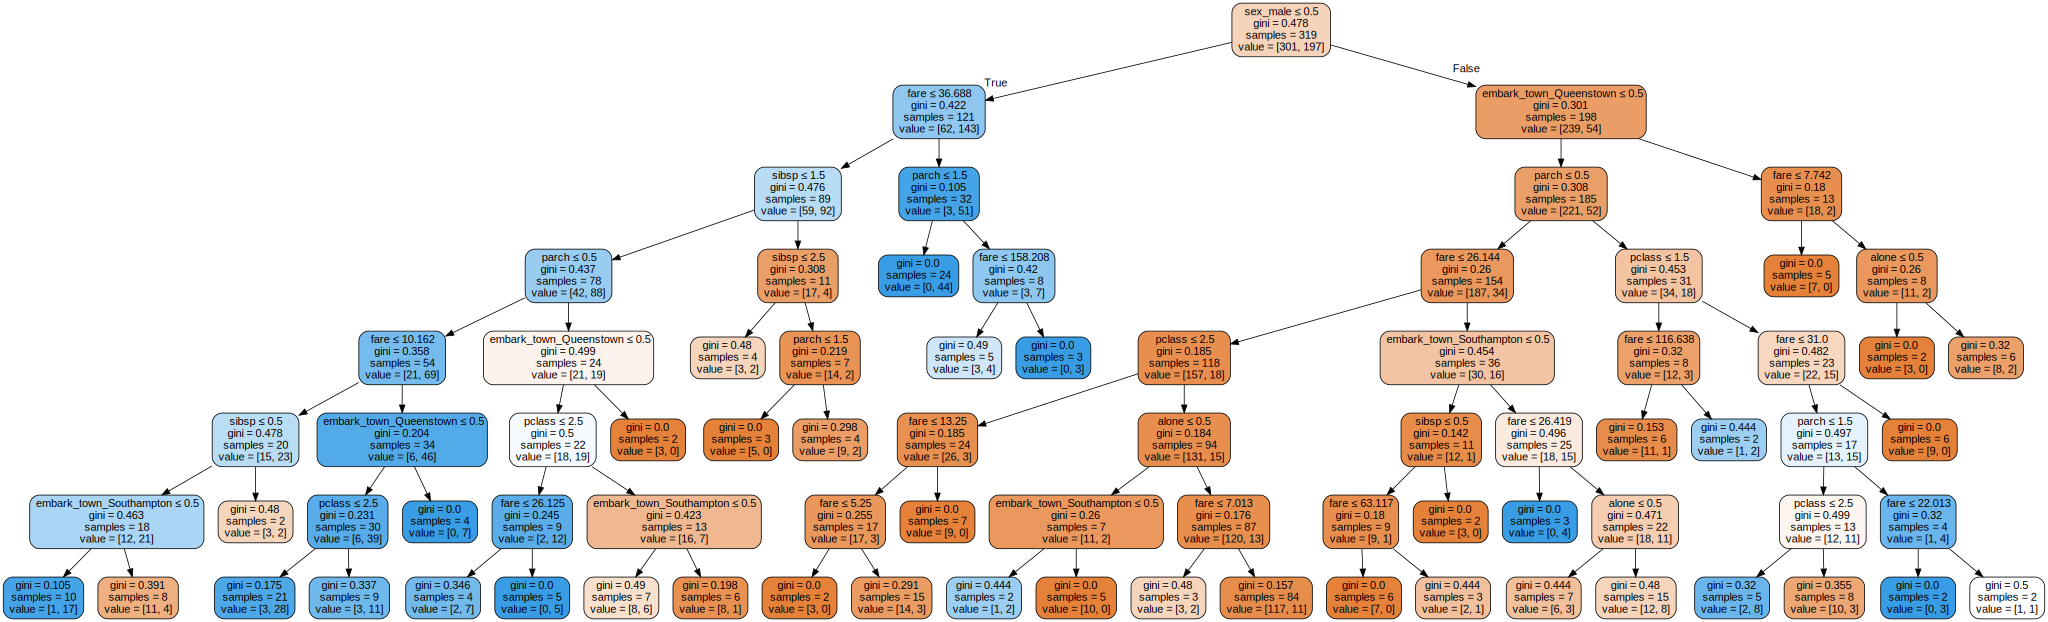

In [59]:
rf2_estimator = titanic_rf2.estimators_[34]
titanic_rf2_data = sklearn.tree.export_graphviz(rf2_estimator, out_file=None, feature_names=X_train.columns, filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(titanic_rf2_data)
graph

In [60]:
titanic_rf3 = RandomForestClassifier(
    bootstrap= True,
    class_weight= None,
    criterion='gini',
    min_samples_leaf=3,
    n_estimators=100,
    max_depth= 4,
    random_state= 302
)
titanic_rf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=3, random_state=302)

In [63]:
rf3_pred = titanic_rf3.predict(X_train)
rf3_actual = y_train
rf3_prob = titanic_rf3.predict_proba(X_train)
print(f'Prediction probability for model: {rf3_prob.mean():.2%}')
print(f'Accuracy of random forest on training set: {titanic_rf3.score(X_train, y_train):.2f}')
print(f'Confusion matrix for random forest on training set:\n{confusion_matrix(rf3_actual, rf3_pred)}')
print(f'Classification report for random forest on set:\n{classification_report(rf3_actual, rf3_pred)}')

Prediction probability for model: 50.00%
Accuracy of random forest on training set: 0.83
Confusion matrix for random forest on training set:
[[291  16]
 [ 70 121]]
Classification report for random forest on set:
              precision    recall  f1-score   support

           0       0.81      0.95      0.87       307
           1       0.88      0.63      0.74       191

    accuracy                           0.83       498
   macro avg       0.84      0.79      0.80       498
weighted avg       0.84      0.83      0.82       498



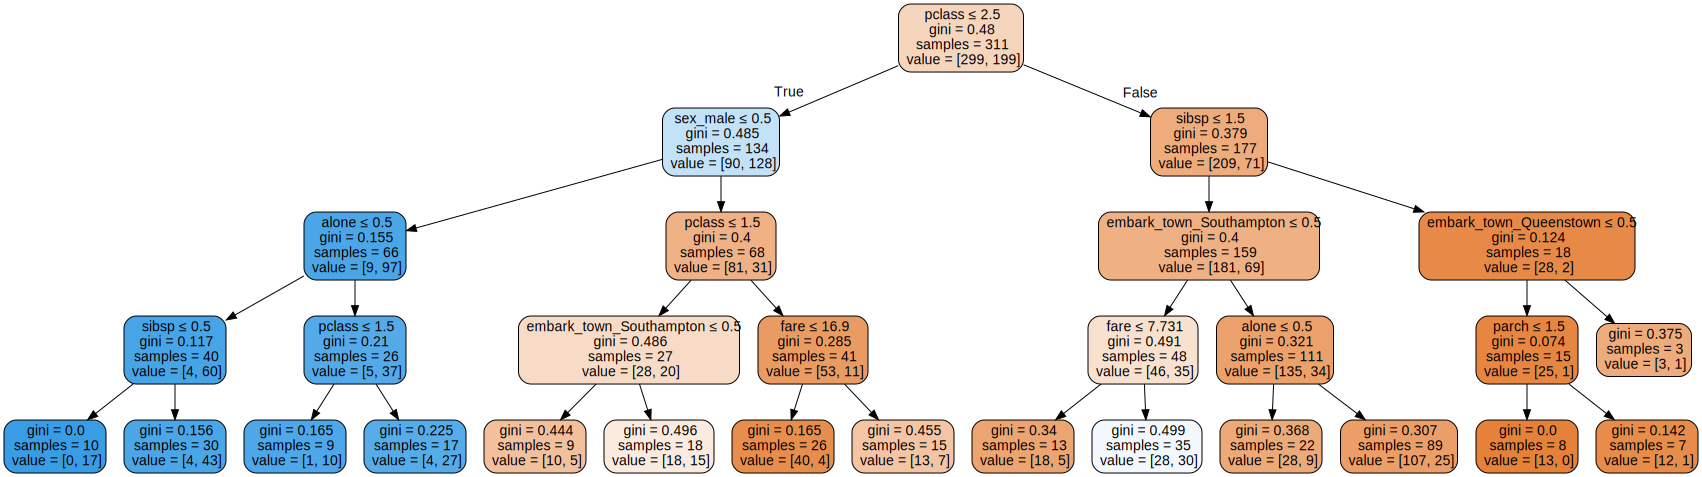

In [62]:
rf3_estimator = titanic_rf3.estimators_[27]
titanic_rf3_data = sklearn.tree.export_graphviz(rf3_estimator, out_file=None, feature_names=X_train.columns, filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(titanic_rf3_data)
graph

### KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
#Make the thing, then fit the thing...
titanic_kn1 = KNeighborsClassifier(n_neighbors=5, weights='uniform')
titanic_kn1.fit(X_train, y_train)

KNeighborsClassifier()

In [70]:
#...and use the thing
kn1_pred = titanic_kn1.predict(X_train)
kn1_actual = y_train
kn1_prob = titanic_kn1.predict_proba(X_train)

print(f'Titanic K Nearest Neighbors (KNN) model 1 predicted probability:{kn1_prob.mean():.2%}')
print(f'Accuracy of Titanic KNN model 1 on training set:{titanic_kn1.score(X_train, y_train):.3f}')
print(f'Classification report for Titanic KNN model 1:\n{classification_report(kn1_actual, kn1_pred)}')
print(f'Titanic KNN model 1 confusion matrix:\n{confusion_matrix(kn1_actual, kn1_pred)}')
# Validate the thing
kn1_val_pred = titanic_kn1.predict(X_validate)
kn1_val_actual = y_validate
print(f'Accuracy score for Titanic KNN model 1 on validating set: {titanic_kn1.score(X_validate, y_validate)}')
print(f'Classification report for Titanic KNN model 1 on validating set:\n{classification_report(kn1_val_actual, kn1_val_pred)}')
print(f'Titanic KNN model 1 confusion matrix (validating set):\n{confusion_matrix(kn1_val_actual, kn1_val_pred)}')



Titanic K Nearest Neighbors (KNN) model 1 predicted probability:50.00%
Accuracy of Titanic KNN model 1 on training set:0.817
Classification report for Titanic KNN model 1:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       307
           1       0.77      0.75      0.76       191

    accuracy                           0.82       498
   macro avg       0.81      0.80      0.81       498
weighted avg       0.82      0.82      0.82       498

Titanic KNN model 1 confusion matrix:
[[264  43]
 [ 48 143]]


In [83]:
titanic_kn2 = KNeighborsClassifier(n_neighbors=10, weights='uniform')
titanic_kn2.fit(X_train, y_train)

kn2_pred = titanic_kn2.predict(X_train)
kn2_actual = y_train
kn2_prob = titanic_kn2.predict_proba(X_train)

print(f'Titanic K Nearest Neighbors (KNN) model 2 predicted probability:{kn2_prob.mean():.2%}')
print(f'Accuracy of Titanic KNN model 2 on training set:{titanic_kn2.score(X_train, y_train):.3f}')
print(f'Classification report for Titanic KNN model 2:\n{classification_report(kn2_actual, kn2_pred)}')
print(f'Titanic KNN model 2 confusion matrix:\n{confusion_matrix(kn2_actual, kn2_pred)}')
print('----------------------------------')
# Validate the thing
kn2_val_pred = titanic_kn2.predict(X_validate)
kn2_val_actual = y_validate
print(f'Accuracy score for Titanic KNN model 2 on validating set: {titanic_kn2.score(X_validate, y_validate)}')
print(f'Classification report for Titanic KNN model 2 on validating set:\n{classification_report(kn2_val_actual, kn2_val_pred)}')
print(f'Titanic KNN model 2 confusion matrix (validating set):\n{confusion_matrix(kn2_val_actual, kn2_val_pred)}')

Titanic K Nearest Neighbors (KNN) model 2 predicted probability:50.00%
Accuracy of Titanic KNN model 2 on training set:0.751
Classification report for Titanic KNN model 2:
              precision    recall  f1-score   support

           0       0.77      0.84      0.81       307
           1       0.70      0.61      0.65       191

    accuracy                           0.75       498
   macro avg       0.74      0.72      0.73       498
weighted avg       0.75      0.75      0.75       498

Titanic KNN model 2 confusion matrix:
[[258  49]
 [ 75 116]]
----------------------------------
Accuracy score for Titanic KNN model 2 on validating set: 0.7476635514018691
Classification report for Titanic KNN model 2 on validating set:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       132
           1       0.67      0.67      0.67        82

    accuracy                           0.75       214
   macro avg       0.73      0.73      0.73  

In [82]:
titanic_kn3 = KNeighborsClassifier(n_neighbors=20, weights='uniform')
titanic_kn3.fit(X_train, y_train)

kn3_pred = titanic_kn3.predict(X_train)
kn3_actual = y_train
kn3_prob = titanic_kn3.predict_proba(X_train)

print(f'Titanic K Nearest Neighbors (KNN) model 3 predicted probability:{kn3_prob.mean():.2%}')
print(f'Accuracy of Titanic KNN model 3 on training set:{titanic_kn3.score(X_train, y_train):.3f}')
print(f'Classification report for Titanic KNN model 3:\n{classification_report(kn3_actual, kn3_pred)}')
print(f'Titanic KNN model 3 confusion matrix:\n{confusion_matrix(kn3_actual, kn3_pred)}')
print('----------------------------------')
# Validate the thing
kn3_val_pred = titanic_kn3.predict(X_validate)
kn3_val_actual = y_validate
print(f'Accuracy score for Titanic KNN model 3 on validating set: {titanic_kn3.score(X_validate, y_validate)}')
print(f'Classification report for Titanic KNN model 3 on validating set:\n{classification_report(kn3_val_actual, kn3_val_pred)}')
print(f'Titanic KNN model 3 confusion matrix (validating set):\n{confusion_matrix(kn3_val_actual, kn3_val_pred)}')

Titanic K Nearest Neighbors (KNN) model 3 predicted probability:50.00%
Accuracy of Titanic KNN model 3 on training set:0.745
Classification report for Titanic KNN model 3:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       307
           1       0.72      0.55      0.62       191

    accuracy                           0.74       498
   macro avg       0.74      0.71      0.72       498
weighted avg       0.74      0.74      0.74       498

Titanic KNN model 3 confusion matrix:
[[266  41]
 [ 86 105]]
----------------------------------
Accuracy score for Titanic KNN model 3 on validating set: 0.7242990654205608
Classification report for Titanic KNN model 3 on validating set:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       132
           1       0.65      0.62      0.63        82

    accuracy                           0.72       214
   macro avg       0.71      0.70      0.71  

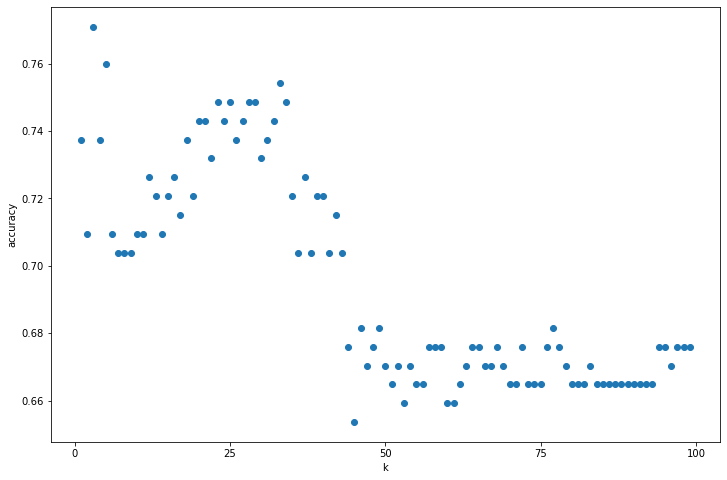

In [85]:
#plot the thing...
k_range = range(1,100)
titan_kn1_scores = []
for k in k_range:
    titan_kn1 = KNeighborsClassifier(n_neighbors = k)
    titan_kn1.fit(X_train, y_train)
    titan_kn1_scores.append(titan_kn1.score(X_test, y_test))

plt.figure(figsize=(12,8))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, titan_kn1_scores)
plt.xticks([0,25,50,75,100])
plt.show()

### Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression

In [91]:
titanic_lr1 = LogisticRegression(C=1, random_state=302, intercept_scaling=1, solver='lbfgs')
titanic_lr1.fit(X_train, y_train)

LogisticRegression(C=1, random_state=302)

In [94]:
print(f'Features\n{X_train.columns}')
print(f'Coefficient:\n{titanic_lr1.coef_}')
print(f'Intercept:\n{titanic_lr1.intercept_}')

Features
Index(['pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male',
       'embark_town_Queenstown', 'embark_town_Southampton'],
      dtype='object')
Coefficient:
[[-7.84623228e-01 -4.76120559e-01 -1.72774196e-01  1.51515066e-03
  -7.13989623e-01 -2.31056807e+00  7.12492231e-01  2.76354877e-02]]
Intercept:
[3.30042856]


In [93]:
lr1_pred = titanic_lr1.predict(X_train)
lr1_actual = y_train
lr1_prob = titanic_lr1.predict_proba(X_train)


print(f'Accuracy of Logistic Regression model 1 (LR1) classifier on training set: {titanic_lr1.score(X_train, y_train):.3f}')
print(f'Predicted probability for LR1: {lr1_prob.mean():.2%}')
print(f'Confusion matrix for LR1:\n{confusion_matrix(lr1_actual, lr1_pred)}')
print(f'Classification report for LR1 on training set:\n{classification_report(lr1_actual, lr1_pred)}')

Accuracy of Logistic Regression model 1 (LR1) classifier on training set: 0.799
Predicted probability for LR1: 50.00%
Confusion matrix for LR1:
[[267  40]
 [ 60 131]]
Classification report for LR1 on training set:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       307
           1       0.77      0.69      0.72       191

    accuracy                           0.80       498
   macro avg       0.79      0.78      0.78       498
weighted avg       0.80      0.80      0.80       498



In [98]:
titanic_lr2 = LogisticRegression(C=0.1, class_weight='balanced', random_state=302, solver='lbfgs')
titanic_lr2.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight='balanced', random_state=302)

In [99]:
print(f'Features\n{X_train.columns}')
print(f'Coefficient:\n{titanic_lr2.coef_}')
print(f'Intercept:\n{titanic_lr2.intercept_}')

Features
Index(['pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male',
       'embark_town_Queenstown', 'embark_town_Southampton'],
      dtype='object')
Coefficient:
[[-0.5709107  -0.32046666 -0.06264004  0.0029129  -0.46323941 -1.59533114
   0.18217331 -0.1511424 ]]
Intercept:
[2.70786191]


In [103]:
lr2_pred = titanic_lr2.predict(X_train)
lr2_actual = y_train
lr2_prob = titanic_lr2.predict_proba(X_train)


print(f'Accuracy of Logistic Regression model 1 (LR2) classifier on training set: {titanic_lr2.score(X_train, y_train):.3f}')
print(f'Predicted probability for LR2: {lr2_prob.mean():.2%}')
print(f'Confusion matrix for LR2:\n{confusion_matrix(lr2_actual, lr2_pred)}')
print(f'Classification report for LR2 on training set:\n{classification_report(lr2_actual, lr2_pred)}')

Accuracy of Logistic Regression model 1 (LR2) classifier on training set: 0.771
Predicted probability for LR2: 50.00%
Confusion matrix for LR2:
[[233  74]
 [ 40 151]]
Classification report for LR2 on training set:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80       307
           1       0.67      0.79      0.73       191

    accuracy                           0.77       498
   macro avg       0.76      0.77      0.76       498
weighted avg       0.78      0.77      0.77       498



In [101]:
titanic_lr3 = LogisticRegression(C=0.05, class_weight='balanced', random_state=302, solver='lbfgs')
titanic_lr3.fit(X_train, y_train)

LogisticRegression(C=0.05, class_weight='balanced', random_state=302)

In [102]:
print(f'Features\n{X_train.columns}')
print(f'Coefficient:\n{titanic_lr3.coef_}')
print(f'Intercept:\n{titanic_lr3.intercept_}')

Features
Index(['pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male',
       'embark_town_Queenstown', 'embark_town_Southampton'],
      dtype='object')
Coefficient:
[[-0.48379891 -0.2403408  -0.01855535  0.00408089 -0.33512894 -1.23158511
   0.1335104  -0.14236206]]
Intercept:
[2.12027439]


In [104]:
lr3_pred = titanic_lr3.predict(X_train)
lr3_actual = y_train
lr3_prob = titanic_lr3.predict_proba(X_train)


print(f'Accuracy of Logistic Regression model 1 (lr3) classifier on training set: {titanic_lr3.score(X_train, y_train):.3f}')
print(f'Predicted probability for LR3: {lr3_prob.mean():.2%}')
print(f'Confusion matrix for LR3:\n{confusion_matrix(lr3_actual, lr3_pred)}')
print(f'Classification report for LR3 on training set:\n{classification_report(lr3_actual, lr3_pred)}')

Accuracy of Logistic Regression model 1 (lr3) classifier on training set: 0.771
Predicted probability for LR3: 50.00%
Confusion matrix for LR3:
[[233  74]
 [ 40 151]]
Classification report for LR3 on training set:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80       307
           1       0.67      0.79      0.73       191

    accuracy                           0.77       498
   macro avg       0.76      0.77      0.76       498
weighted avg       0.78      0.77      0.77       498

